# Machine Learning Foundation

## Course 3, Part b: K-Nearest Neighbor LAB


## Introduction and Learning Goals

In this lab, we will explore classification using the K-Nearest Neighbors approach. We will use a customer churn dataset from the telecom industry, which includes customer data such as long-distance usage, data usage, monthly revenue, types of offerings, and other services purchased by customers. The data, based on a fictional telecom firm, includes several Excel files which have been combined and are available in the course materials. We are using the subset of customers who have phone accounts. Since the data includes a mix of numeric, categorical, and ordinal variables, we will load this data and do some preprocessing. Then we will use K-nearest neighbors to predict customer churn rates.

After completing this lab, you should have a working understanding of how to preprocess a variety of variables to apply the K-Nearest Neighbors algorithm, understand how to choose K, and understand how to evaluate model performance.


Trong bài lab này, chúng ta sẽ khám phá việc phân loại bằng cách sử dụng phương pháp K-Nearest Neighbors. Chúng tôi sẽ sử dụng tập dữ liệu về khách hàng rời bỏ từ ngành viễn thông, bao gồm dữ liệu khách hàng như mức sử dụng đường dài, mức sử dụng dữ liệu, doanh thu hàng tháng, các loại dịch vụ và các dịch vụ khác mà khách hàng mua.
Dữ liệu, dựa trên một công ty viễn thông hư cấu, bao gồm một số tệp Excel đã được kết hợp và có sẵn trong tài liệu khóa học. Chúng tôi đang sử dụng tập hợp con khách hàng có tài khoản điện thoại.

Vì dữ liệu bao gồm sự kết hợp của các biến số, phân loại và thứ tự nên chúng tôi sẽ tải dữ liệu này và thực hiện một số bước tiền xử lý. Sau đó, chúng tôi sẽ sử dụng K hàng xóm gần nhất để dự đoán tỷ lệ rời bỏ của khách hàng.

Sau khi hoàn thành bài thực hành này, bạn phải hiểu rõ cách xử lý trước nhiều biến khác nhau để áp dụng thuật toán K-Nearest Neighbors, hiểu cách chọn K và hiểu cách đánh giá hiệu suất mô hình.


In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import pandas as pd, numpy as np, matplotlib.pyplot as plt, os, sys, seaborn as sns

## Question 1

*   We begin by importing the data. Examine the columns and data.
*   Notice that the data contains a unique ID, an indicator for phone customer status, total lifetime value, total revenue, and a bank-estimated churn score. We will not be using these features, so they can be dropped from the data.
*   Begin by taking an initial look at the data, including both numeric and non-numeric features.

Câu hỏi 1

bắt đầu bằng cách nhập dữ liệu. Kiểm tra các cột và dữ liệu.

Lưu ý  dữ liệu chứa một ID duy nhất, chỉ báo trạng thái khách hàng qua điện thoại, tổng giá trị trọn đời, tổng doanh thu và điểm rời bỏ ước tính của ngân hàng.

Chúng tôi sẽ không sử dụng các tính năng này nên chúng có thể bị xóa khỏi dữ liệu.

Bắt đầu bằng cách xem xét dữ liệu ban đầu, bao gồm cả các đặc điểm số và không phải số.

In [2]:
### BEGIN SOLUTION

df = pd.read_csv(r"C:\Users\ASUS\Downloads\churndata_processed.csv")

In [3]:
#thống kê mô tả cho các cột trong DataFrame df, các giá trị thống kê này đến 2 chữ số thập phân
df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
0,0.00,0,0.094118,0,0,1,0,0,0.0,1,...,0,0,1,0,0,0,0,0,0,0
1,0.00,1,0.200000,0,1,0,0,1,0.0,1,...,1,0,0,1,0,0,0,0,0,1
2,0.25,1,0.611765,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,0,1,0
3,0.25,0,0.141176,0,1,1,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.50,1,0.164706,0,0,0,0,1,0.0,1,...,0,0,0,1,0,0,0,1,0,0


In [4]:
df.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'contract', 'paperless', 'monthly',
       'satisfaction', 'churn_value', 'payment_Credit Card',
       'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E'],
      dtype='object')

In [5]:
df.describe()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,contract,paperless,...,payment_Credit Card,payment_Mailed Check,internet_type_DSL,internet_type_Fiber Optic,internet_type_None,offer_Offer A,offer_Offer B,offer_Offer C,offer_Offer D,offer_Offer E
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.433551,0.421837,0.241358,0.286668,0.344881,0.343888,0.290217,0.673719,0.377396,0.592219,...,0.390317,0.054664,0.234559,0.430924,0.216669,0.073832,0.116996,0.058924,0.085475,0.114298
std,0.398231,0.493888,0.240223,0.452237,0.475363,0.475038,0.453895,0.468885,0.424234,0.491457,...,0.487856,0.227340,0.423753,0.495241,0.412004,0.261516,0.321438,0.235499,0.279607,0.318195
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.035294,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.250000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.750000,1.000000,0.317647,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [8]:
df.shape

(7043, 23)

## Question 2

*   Identify which variables are binary, categorical and not ordinal, categorical and ordinal, and numeric.  The non-numeric features will need to be encoded using methods we have discussed in the course.
*   Start by identifying the number of unique values each variable takes, then create list variables for categorical, numeric, binary, and ordinal variables.
*   Note that the variable 'months' can be treated as numeric, but it may be more convenient to transform it to an ordinal variable.
*   For the other categorical variables, examine their values to determine which may be encoded ordinally.

Câu hỏi 2
Xác định các biến nào là nhị phân, phân loại và không thứ tự, phân loại và thứ tự, và số. Các tính năng không phải số sẽ cần được mã hóa bằng các phương pháp mà chúng tôi đã thảo luận trong khóa học.

Bắt đầu bằng cách xác định số lượng giá trị duy nhất mà mỗi biến nhận, sau đó tạo các biến danh sách cho các biến phân loại, số, nhị phân và thứ tự.

Lưu ý rằng biến 'tháng' có thể được coi là số, nhưng sẽ thuận tiện hơn khi chuyển đổi nó thành biến thứ tự.
Đối với các biến phân loại khác, hãy kiểm tra giá trị của chúng để xác định giá trị nào có thể được mã hóa theo thứ tự.

In [9]:
### BEGIN SOLUTION
# Tạo một DataFrame mới để lưu trữ số lượng giá trị duy nhất của mỗi cột trong DataFrame df
# Sử dụng list comprehension để duyệt qua từng cột trong df, lấy tên cột và số lượng giá trị duy nhất của cột đó
# Đặt tên các cột mới là 'Variable' và 'Unique Values', và đặt 'Variable' làm chỉ số (index)
df.nunique()

# Hiển thị DataFrame mới chứa thông tin về số lượng giá trị duy nhất của từng cột

months                          5
multiple                        2
gb_mon                         50
security                        2
backup                          2
protection                      2
support                         2
unlimited                       2
contract                        3
paperless                       2
monthly                      1585
satisfaction                    5
churn_value                     2
payment_Credit Card             2
payment_Mailed Check            2
internet_type_DSL               2
internet_type_Fiber Optic       2
internet_type_None              2
offer_Offer A                   2
offer_Offer B                   2
offer_Offer C                   2
offer_Offer D                   2
offer_Offer E                   2
dtype: int64

In [10]:
# Tạo danh sách các biến nhị phân, tức là các cột trong df có đúng 2 giá trị duy nhất
# Lọc df_uniques để chỉ lấy các hàng có số lượng giá trị duy nhất bằng 2
# Lấy index của các hàng này (tên các cột) và chuyển đổi thành danh sách
binary_variables = df.columns[df.nunique() == 2].to_list()
print("List of binary variables:")
print(binary_variables)

# Hiển thị danh sách các biến nhị phân

List of binary variables:
['multiple', 'security', 'backup', 'protection', 'support', 'unlimited', 'paperless', 'churn_value', 'payment_Credit Card', 'payment_Mailed Check', 'internet_type_DSL', 'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A', 'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E']


In [11]:
# Tạo danh sách các biến phân loại, tức là các cột trong df có từ 3 đến 6 giá trị duy nhất
# Lọc df_uniques để chỉ lấy các hàng có số lượng giá trị duy nhất lớn hơn 2 và nhỏ hơn hoặc bằng 6
# Lấy index của các hàng này (tên các cột) và chuyển đổi thành danh sách
df_uniques = df.nunique()
categorical_columns = df_uniques[(df_uniques > 2) & (df_uniques <= 6)].index.tolist()

# Hiển thị danh sách các biến phân loại
categorical_columns

['months', 'contract', 'satisfaction']

In [12]:
# Tạo danh sách các cặp [tên cột, danh sách các giá trị duy nhất] cho các biến phân loại
# Duyệt qua từng cột trong danh sách các biến phân loại (categorical_variables)
# Với mỗi cột, tạo một cặp gồm tên cột và danh sách các giá trị duy nhất trong cột đó
categorical_values = [[col, df[col].unique().tolist()] for col in categorical_columns]
# Hiển thị danh sách các cặp [tên cột, danh sách các giá trị duy nhất]
categorical_values

[['months', [0.0, 0.25, 0.5, 1.0, 0.75]],
 ['contract', [0.0, 0.5, 1.0]],
 ['satisfaction', [0.5, 0.25, 0.0, 0.75, 1.0]]]

In [13]:
# Định nghĩa danh sách các biến thứ bậc, tức là các cột trong df có giá trị mang tính chất thứ bậc
# Trong trường hợp này, các biến thứ bậc là 'contract' và 'satisfaction'
ordinal_variables = ['contract', 'satisfaction']
# Hiển thị danh sách các biến thứ bậc
ordinal_variables

['contract', 'satisfaction']

In [14]:
# Lấy danh sách các giá trị duy nhất trong cột 'months'
unique_months = df['months'].unique()
# Hiển thị danh sách các giá trị duy nhất
print(unique_months)

[0.   0.25 0.5  1.   0.75]


In [15]:
# Thêm cột 'months' vào danh sách các biến thứ bậc
ordinal_variables.append('months')

# Hiển thị danh sách các biến thứ bậc sau khi thêm 'months'
print("Danh sách các biến thứ bậc sau khi thêm 'months':", ordinal_variables)

Danh sách các biến thứ bậc sau khi thêm 'months': ['contract', 'satisfaction', 'months']


In [16]:
# Tạo danh sách các biến số
numeric_variables = [col for col in df.columns if col not in binary_variables + ordinal_variables]
# Hiển thị danh sách các biến số
print("Danh sách các biến nhị phân:", binary_variables)
print("Danh sách các biến số:", numeric_variables)

Danh sách các biến nhị phân: ['multiple', 'security', 'backup', 'protection', 'support', 'unlimited', 'paperless', 'churn_value', 'payment_Credit Card', 'payment_Mailed Check', 'internet_type_DSL', 'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A', 'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E']
Danh sách các biến số: ['gb_mon', 'monthly']


In [17]:
print("Các biến nhị phân:")
for col in binary_variables:
    print(col)

Các biến nhị phân:
multiple
security
backup
protection
support
unlimited
paperless
churn_value
payment_Credit Card
payment_Mailed Check
internet_type_DSL
internet_type_Fiber Optic
internet_type_None
offer_Offer A
offer_Offer B
offer_Offer C
offer_Offer D
offer_Offer E


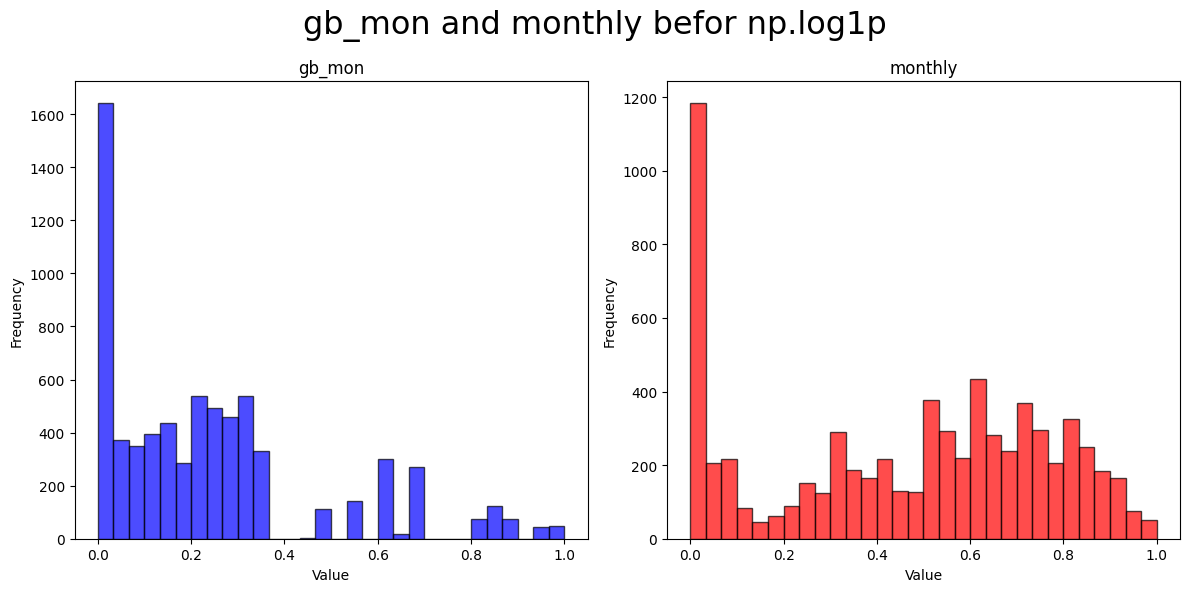

In [18]:
# Vẽ histogram của các biến số từ DataFrame df
data1 = df['gb_mon']
data2 = df['monthly']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('gb_mon and monthly befor np.log1p', size=23)

ax1.hist(data1, bins=30, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('gb_mon')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

ax2.hist(data2, bins=30, alpha=0.7, color='red', edgecolor='black')
ax2.set_title('monthly')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

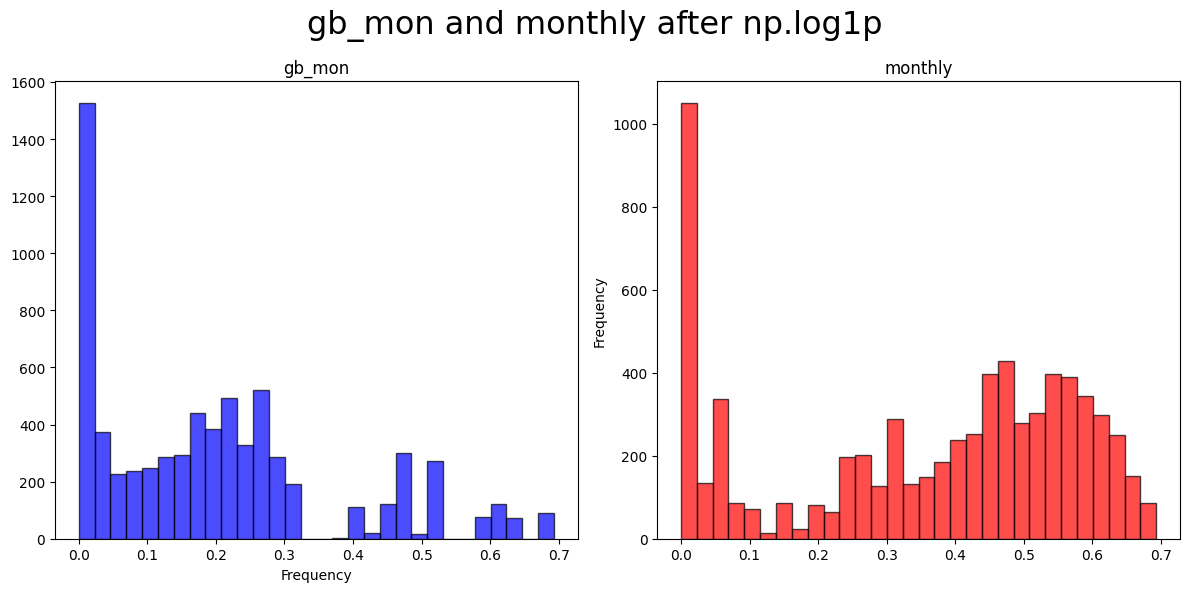

In [19]:
data1 = df['gb_mon'].apply(np.log1p)
data2 = df['monthly'].apply(np.log1p)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

fig.suptitle('gb_mon and monthly after np.log1p', size=23)

ax1.hist(data1, bins=30, alpha=0.7, color='blue', edgecolor='black')
ax1.set_title('gb_mon')
ax1.set_xlabel('Value')
ax1.set_xlabel('Frequency')

ax2.hist(data2, bins=30, alpha=0.7, color='red', edgecolor='black')
ax2.set_title('monthly')
ax2.set_ylabel('Value')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   months                     7043 non-null   float64
 1   multiple                   7043 non-null   int64  
 2   gb_mon                     7043 non-null   float64
 3   security                   7043 non-null   int64  
 4   backup                     7043 non-null   int64  
 5   protection                 7043 non-null   int64  
 6   support                    7043 non-null   int64  
 7   unlimited                  7043 non-null   int64  
 8   contract                   7043 non-null   float64
 9   paperless                  7043 non-null   int64  
 10  monthly                    7043 non-null   float64
 11  satisfaction               7043 non-null   float64
 12  churn_value                7043 non-null   int64  
 13  payment_Credit Card        7043 non-null   int64

In [21]:
# Chia các giá trị trong cột 'months' thành 5 khoảng
df['months_bins'] = pd.cut(df['months'], bins=5, labels=False)
# Hiển thị DataFrame sau khi thêm cột 'months_bins'
df['months_bins']
### END SOLUTION

0       0
1       0
2       1
3       1
4       2
       ..
7038    4
7039    1
7040    4
7041    0
7042    4
Name: months_bins, Length: 7043, dtype: int64

## Question 3

*   Having set up the variables, remember that the K-nearest neighbors algorithm uses distance and hence requires scaled data.
*   Scale the data using one of the scaling methods discussed in the course.
*   Save the processed dataframe as a comma-separated file: 'churndata_processed.csv'


In [22]:
### BEGIN SOLUTION
# Import các công cụ từ sklearn.preprocessing để phục vụ cho việc mã hóa các biến
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [23]:
# Khởi tạo hai đối tượng LabelBinarizer và LabelEncoder từ sklearn.preprocessing
lb = LabelBinarizer()
le = LabelEncoder()

In [24]:
# Duyệt qua từng cột trong danh sách biến thứ bậc (ordinal_variables)

    # Sử dụng LabelEncoder để mã hóa các giá trị trong cột thành các số nguyên

label_encoders = {}

for col in ordinal_variables:
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Hiển thị DataFrame sau khi mã hóa

# Hiển thị các LabelEncoder đã sử dụng
for col, le in label_encoders.items():
    print(f"Column: {col}")
    print(dict(zip(le.classes_, le.transform(le.classes_))))

Column: contract
{0.0: 0, 0.25: 1, 0.5: 2, 0.75: 3, 1.0: 4}
Column: satisfaction
{0.0: 0, 0.25: 1, 0.5: 2, 0.75: 3, 1.0: 4}
Column: months
{0.0: 0, 0.25: 1, 0.5: 2, 0.75: 3, 1.0: 4}


In [25]:
label_encoders = {}
for col in ordinal_variables:
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

for col, le in label_encoders.items():
    print(f"Columns: {col}")
    print(dict(zip(le.classes_, le.transform(le.classes_))))

Columns: contract
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Columns: satisfaction
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}
Columns: months
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


In [26]:
# Hiển thị thông tin mô tả về các biến thứ bậc (ordinal variables) trong DataFrame df
# Chuyển đổi các cột thành kiểu dữ liệu category trước khi áp dụng describe để tính toán thông tin mô tả
df['contract'] = df['contract'].astype('category')
df['satisfaction'] = df['satisfaction'].astype('category')
df['months'] = df['months'].astype('category')
# Hiển thị thông tin mô tả về các biến thứ bậc trong DataFrame df
df.describe(include='category')

,months,contract,satisfaction
count,7043,7043,7043
unique,5,3,5
top,0,0,2
freq,2470,3610,2665


In [27]:
# Duyệt qua từng cột trong danh sách biến nhị phân (binary_variables)
    # Sử dụng LabelBinarizer để chuyển đổi các giá trị trong cột thành dạng nhị phân (0 và 1)
label_binarizers = {}
for col in binary_variables:
    df[col] = lb.fit_transform(df[col])
    label_binarizers[col] = lb

for col, lb in label_binarizers.items():
    print(f"Columns: {col}")
    print(dict(zip(lb.classes_, lb.transform(lb.classes_))))

Columns: multiple
{0: array([0]), 1: array([1])}
Columns: security
{0: array([0]), 1: array([1])}
Columns: backup
{0: array([0]), 1: array([1])}
Columns: protection
{0: array([0]), 1: array([1])}
Columns: support
{0: array([0]), 1: array([1])}
Columns: unlimited
{0: array([0]), 1: array([1])}
Columns: paperless
{0: array([0]), 1: array([1])}
Columns: churn_value
{0: array([0]), 1: array([1])}
Columns: payment_Credit Card
{0: array([0]), 1: array([1])}
Columns: payment_Mailed Check
{0: array([0]), 1: array([1])}
Columns: internet_type_DSL
{0: array([0]), 1: array([1])}
Columns: internet_type_Fiber Optic
{0: array([0]), 1: array([1])}
Columns: internet_type_None
{0: array([0]), 1: array([1])}
Columns: offer_Offer A
{0: array([0]), 1: array([1])}
Columns: offer_Offer B
{0: array([0]), 1: array([1])}
Columns: offer_Offer C
{0: array([0]), 1: array([1])}
Columns: offer_Offer D
{0: array([0]), 1: array([1])}
Columns: offer_Offer E
{0: array([0]), 1: array([1])}


In [28]:
# Loại bỏ các biến thứ bậc dựa trên giá trị của chúng
binary_variables = [var for var in binary_variables if df[var].dropna().isin([0, 1]).all()]
print("Các biến phân loại sau khi loại bỏ các biến thứ bậc:", binary_variables)

Các biến phân loại sau khi loại bỏ các biến thứ bậc: ['multiple', 'security', 'backup', 'protection', 'support', 'unlimited', 'paperless', 'churn_value', 'payment_Credit Card', 'payment_Mailed Check', 'internet_type_DSL', 'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A', 'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E']


In [29]:
# Biến đổi các biến phân loại thành biến giả và thêm vào DataFrame df
df = pd.get_dummies(df, drop_first=True)
df.head()

,multiple,gb_mon,security,backup,protection,support,unlimited,paperless,monthly,churn_value,...,months_1,months_2,months_3,months_4,contract_1,contract_2,satisfaction_1,satisfaction_2,satisfaction_3,satisfaction_4
0,0,0.094118,0,0,1,0,0,1,0.212935,1,...,False,False,False,False,False,False,False,True,False,False
1,1,0.200000,0,1,0,0,1,1,0.620896,1,...,False,False,False,False,False,False,False,True,False,False
2,1,0.611765,0,0,0,0,1,1,0.768159,1,...,True,False,False,False,False,False,True,False,False,False
3,0,0.141176,0,1,1,0,1,1,0.798507,1,...,True,False,False,False,False,False,True,False,False,False
4,1,0.164706,0,0,0,0,1,1,0.579602,1,...,False,True,False,False,False,False,True,False,False,False


In [30]:
# Tính toán và hiển thị các thống kê mô tả cho tất cả các cột trong DataFrame df, sau đó chuyển vị
df.describe().T

,count,mean,std,min,25%,50%,75%,max
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0
monthly,7043.0,0.462803,0.299403,0.0,0.171642,0.518408,0.712438,1.0
churn_value,7043.0,0.265370,0.441561,0.0,0.000000,0.000000,1.000000,1.0


In [31]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo MinMaxScaler
min_max = MinMaxScaler()

In [32]:
# Gộp danh sách biến thứ bậc và biến số thành một danh sách duy nhất
all = numeric_variables + binary_variables

# Chuẩn hóa dữ liệu cho các cột được chỉ định
df[numeric_variables] = df[numeric_variables] / df[numeric_variables].max()

In [33]:
# Tính toán và làm tròn các thống kê mô tả
df.describe().T

,count,mean,std,min,25%,50%,75%,max
multiple,7043.0,0.421837,0.493888,0.0,0.000000,0.000000,1.000000,1.0
gb_mon,7043.0,0.241358,0.240223,0.0,0.035294,0.200000,0.317647,1.0
security,7043.0,0.286668,0.452237,0.0,0.000000,0.000000,1.000000,1.0
backup,7043.0,0.344881,0.475363,0.0,0.000000,0.000000,1.000000,1.0
protection,7043.0,0.343888,0.475038,0.0,0.000000,0.000000,1.000000,1.0
support,7043.0,0.290217,0.453895,0.0,0.000000,0.000000,1.000000,1.0
unlimited,7043.0,0.673719,0.468885,0.0,0.000000,1.000000,1.000000,1.0
paperless,7043.0,0.592219,0.491457,0.0,0.000000,1.000000,1.000000,1.0
monthly,7043.0,0.462803,0.299403,0.0,0.171642,0.518408,0.712438,1.0
churn_value,7043.0,0.265370,0.441561,0.0,0.000000,0.000000,1.000000,1.0


from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

for column in [ordinal_variables + numeric_variables]:

    df[column] = mm.fit_transform(df[column])
    
round(df.describe().T, 3)

In [34]:
from sklearn.preprocessing import MinMaxScaler

for column in all:
    # Reshape the column into a DataFrame with a single column
    column_data = df[[column]]
    # Apply the scaler to the reshaped DataFrame
    df[[column]] = min_max.fit_transform(column_data)

# Now, you can check the descriptive statistics
round(df.describe().T, 3)

# Lưu một bản sao của dữ liệu đã được xử lý để sử dụng sau này

,count,mean,std,min,25%,50%,75%,max
multiple,7043.0,0.422,0.494,0.0,0.000,0.000,1.000,1.0
gb_mon,7043.0,0.241,0.240,0.0,0.035,0.200,0.318,1.0
security,7043.0,0.287,0.452,0.0,0.000,0.000,1.000,1.0
backup,7043.0,0.345,0.475,0.0,0.000,0.000,1.000,1.0
protection,7043.0,0.344,0.475,0.0,0.000,0.000,1.000,1.0
support,7043.0,0.290,0.454,0.0,0.000,0.000,1.000,1.0
unlimited,7043.0,0.674,0.469,0.0,0.000,1.000,1.000,1.0
paperless,7043.0,0.592,0.491,0.0,0.000,1.000,1.000,1.0
monthly,7043.0,0.463,0.299,0.0,0.172,0.518,0.712,1.0
churn_value,7043.0,0.265,0.442,0.0,0.000,0.000,1.000,1.0


## Question 4

*   Now that the data are encoded and scaled, separate the features (X) from the target (y, churn_value).
*   Split the sample into training and test samples, with the test sample representing 40% of observations.
*   Estimate a K-Nearest Neighbors model, using K=3.
*   Examine the Precision, Recall, F-1 Score, and Accuracy of the classification.
*   Use a graphic to illustrate the Confusion Matrix.


Câu hỏi 4
Bây giờ dữ liệu đã được mã hóa và chia tỷ lệ, hãy tách các tính năng (X) khỏi mục tiêu (y, khuấy_value).

Chia mẫu thành mẫu huấn luyện và mẫu kiểm tra, với mẫu kiểm tra chiếm 40% số quan sát.

Ước tính mô hình K-Láng giềng gần nhất, sử dụng K=3.

Kiểm tra Độ chính xác, Thu hồi, Điểm F-1 và Độ chính xác của phân loại.

Sử dụng đồ họa để minh họa Ma trận nhầm lẫn.

In [35]:
### BEGIN SOLUTION
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

In [36]:
df.columns

Index(['multiple', 'gb_mon', 'security', 'backup', 'protection', 'support',
       'unlimited', 'paperless', 'monthly', 'churn_value',
       'payment_Credit Card', 'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E',
       'months_bins', 'months_1', 'months_2', 'months_3', 'months_4',
       'contract_1', 'contract_2', 'satisfaction_1', 'satisfaction_2',
       'satisfaction_3', 'satisfaction_4'],
      dtype='object')

In [37]:
# Thiết lập biến X và y
a = ['multiple', 'gb_mon', 'security', 'backup', 'protection', 'support',
       'unlimited', 'paperless', 'monthly', 'churn_value',
       'payment_Credit Card', 'payment_Mailed Check', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'offer_Offer A',
       'offer_Offer B', 'offer_Offer C', 'offer_Offer D', 'offer_Offer E', 'months_1', 'months_2', 'months_3', 'months_4',
       'contract_1', 'contract_2', 'satisfaction_1', 'satisfaction_2',
       'satisfaction_3', 'satisfaction_4']

# Chia dữ liệu thành mẫu huấn luyện và mẫu kiểm tra
# Sử dụng test_size=0.4 để chia tỷ lệ 60-40 cho mẫu kiểm tra và mẫu huấn luyện
# Sử dụng random_state=42
X = df[a]
y = df['months_bins']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_1 = knn_model.predict(X_test)

# Step 5: Evaluate model
report_1 = classification_report(y_test, y_pred_1)
print("Classification Report:\n", report_1)
accuracy_score = accuracy_score(y_test, y_pred_1)
print(f"accuracy = {accuracy_score}")

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       499
           1       0.99      0.94      0.96       221
           2       0.99      0.94      0.96       176
           3       0.99      0.88      0.94       190
           4       0.99      0.98      0.98       323

    accuracy                           0.96      1409
   macro avg       0.97      0.94      0.96      1409
weighted avg       0.96      0.96      0.96      1409

accuracy = 0.9559971611071683


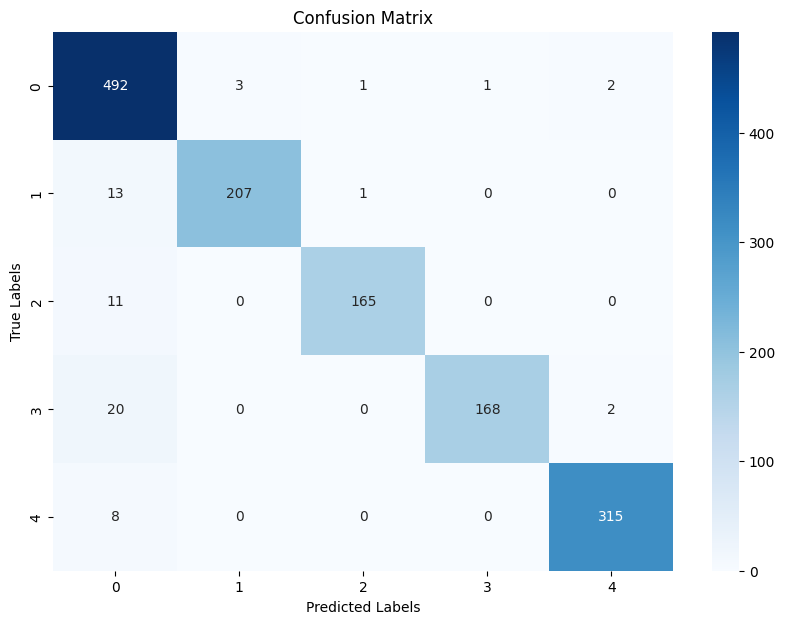

In [45]:
# Vẽ biểu đồ  confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_1)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
### END SOLUTION

## Question 5

*   Using the same split of training and test samples, estimate another K-Nearest Neighbors model.
*   This time, use K=5 and weight the results by distance.
*   Again, examine the Precision, Recall, F-1 Score, and Accuracy of the classification, and visualize the Confusion Matrix.

Câu hỏi 5
Sử dụng cùng một mẫu huấn luyện và mẫu thử nghiệm, ước tính một mô hình K-Nearest Neighbors khác.

Lần này, sử dụng K=5 và tính kết quả theo khoảng cách.

Một lần nữa, hãy kiểm tra Độ chính xác, Thu hồi, Điểm F-1 và Độ chính xác của phân loại và hình dung Ma trận Nhầm lẫn.


In [41]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred_2 = knn_model.predict(X_test)

# Step 5: Evaluate model
report_2 = classification_report(y_test, y_pred_2)
print("Classification Report:\n", report_2)
accuracy_value = accuracy_score(y_test, y_pred_2)  # Renamed the variable to avoid conflict
print(f"Accuracy = {accuracy_value}")

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       499
           1       1.00      0.95      0.97       221
           2       1.00      0.95      0.97       176
           3       0.99      0.88      0.94       190
           4       0.99      0.98      0.98       323

    accuracy                           0.96      1409
   macro avg       0.98      0.95      0.96      1409
weighted avg       0.97      0.96      0.96      1409

Accuracy = 0.9623846699787083


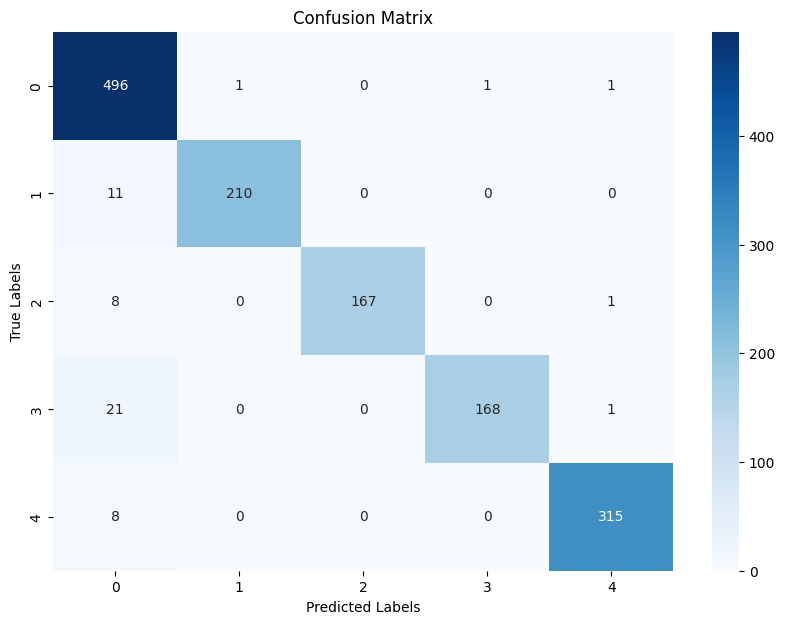

In [43]:
# vẽ biểu đồ confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
### END SOLUTION

## Question 6

*   To determine the right value for K, examine results for values of K from 1 to 40.
*   This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).
*   Generate charts which plot each of these measures as a function of K.
*   What do these charts suggest about the optimal value for K?


In [38]:
max_k = 40
f1_scores = []
error_rates = []

for k in range(1, max_k + 1):
    # Step 1: Initialize and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    
    # Step 2: Make predictions
    y_pred = knn_model.predict(X_test)
    
    # Step 3: Calculate F1 Score and error rate
    f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'weighted' to handle multi-class
    error_rate = 1 - accuracy_score(y_test, y_pred)
    
    # Step 4: Store the results
    f1_scores.append(f1)
    error_rates.append(error_rate)

# Step 5: Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': range(1, max_k + 1),
    'F1_Score': f1_scores,
    'Error_Rate': error_rates
})

print(results_df)

     k  F1_Score  Error_Rate
0    1  0.945323    0.054649
1    2  0.913035    0.087296
2    3  0.956122    0.044003
3    4  0.937347    0.063165
4    5  0.962475    0.037615
5    6  0.947820    0.052520
6    7  0.959698    0.040454
7    8  0.954743    0.045422
8    9  0.959687    0.040454
9   10  0.957646    0.042583
10  11  0.960405    0.039744
11  12  0.955510    0.044713
12  13  0.956846    0.043293
13  14  0.952725    0.047551
14  15  0.954061    0.046132
15  16  0.952649    0.047551
16  17  0.954059    0.046132
17  18  0.952616    0.047551
18  19  0.952618    0.047551
19  20  0.948398    0.051810
20  21  0.952724    0.047551
21  22  0.947781    0.052520
22  23  0.952744    0.047551
23  24  0.950591    0.049681
24  25  0.952047    0.048261
25  26  0.949945    0.050390
26  27  0.950625    0.049681
27  28  0.947111    0.053229
28  29  0.948501    0.051810
29  30  0.947784    0.052520
30  31  0.948510    0.051810
31  32  0.946346    0.053939
32  33  0.948476    0.051810
33  34  0.9434

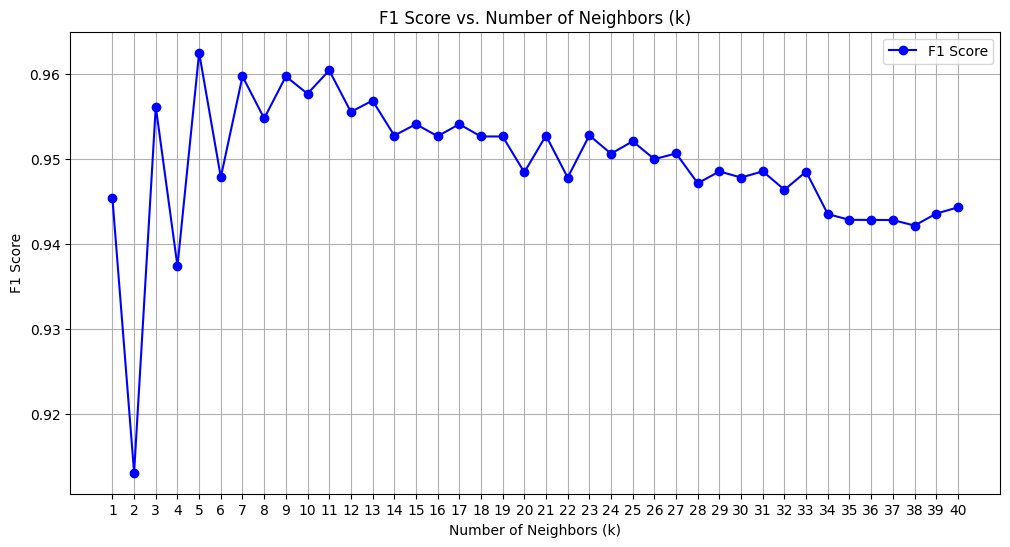

In [39]:
# Plot F1 results
plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['F1_Score'], marker='o', linestyle='-', color='b', label='F1 Score')
plt.title('F1 Score vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.legend()
plt.show()

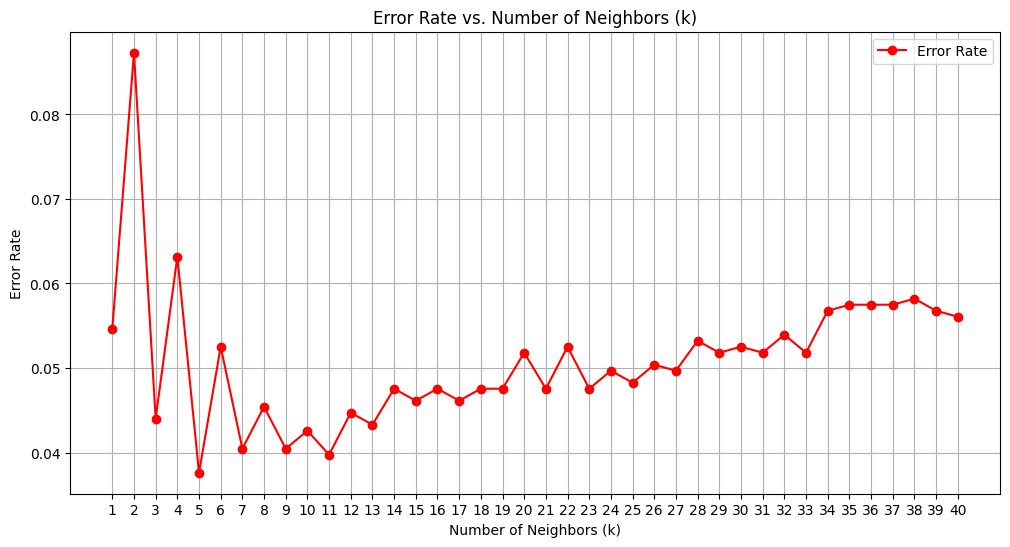

In [40]:
# Plot Accuracy (Error Rate) results
plt.figure(figsize=(12, 6))
plt.plot(results_df['k'], results_df['Error_Rate'], marker='o', linestyle='-', color='r', label='Error Rate')
plt.title('Error Rate vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.xticks(range(1, max_k + 1))
plt.grid(True)
plt.legend()
plt.show()
### END SOLUTION

***

### Machine Learning Foundation (C) 2020 IBM Corporation
